<a href="https://colab.research.google.com/github/shuvookd/Short_Dark_Triad/blob/main/CSE303_Project(Short_Dark_Triad).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

In [ ]:
df=pd.read_csv("/content/SD3_data.csv")

**1. Exploratory Data Analysis**

In [ ]:
df2=df.copy()

In [ ]:
df2.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P2,P3,P4,P5,P6,P7,P8,P9,country,source
0,4,4,4,4,4,4,4,3,4,2,...,4,3,2,4,4,4,4,4,GB,1
1,2,1,5,2,2,1,2,2,3,1,...,1,1,5,4,1,5,3,2,US,1
2,3,3,3,5,1,1,5,5,3,2,...,5,3,1,3,1,2,3,1,US,1
3,5,5,4,5,5,5,5,5,5,5,...,1,5,2,5,5,5,1,5,GB,3
4,4,4,2,5,5,5,4,1,4,3,...,5,3,1,4,3,5,4,1,GB,3


In [ ]:
df2.shape

(18192, 29)

In [ ]:
df2.describe()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P1,P2,P3,P4,P5,P6,P7,P8,P9,source
count,18192.000000,18192.000000,18192.000000,18192.000000,18192.000000,18192.000000,18192.000000,18192.00000,18192.000000,18192.000000,...,18192.000000,18192.000000,18192.000000,18192.000000,18192.000000,18192.000000,18192.000000,18192.000000,18192.000000,18192.000000
mean,4.179035,3.476913,3.363017,3.501704,3.569536,3.649516,4.376649,3.16040,4.074263,3.269459,...,3.066018,3.205310,2.619888,2.322889,3.709213,2.953881,3.537104,2.595921,2.795954,1.764677
std,0.962604,1.270001,1.205476,1.190131,1.316122,1.274516,0.870393,1.24459,0.998836,1.147739,...,1.270161,1.227651,1.306869,1.268984,1.160756,1.236222,1.446173,1.463398,1.376643,0.891435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,2.00000,4.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.00000,4.000000,3.000000,...,3.000000,3.000000,2.000000,2.000000,4.000000,3.000000,4.000000,2.000000,3.000000,1.000000
75%,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.00000,5.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,5.000000,4.000000,5.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18192 entries, 0 to 18191
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   M1       18192 non-null  int64 
 1   M2       18192 non-null  int64 
 2   M3       18192 non-null  int64 
 3   M4       18192 non-null  int64 
 4   M5       18192 non-null  int64 
 5   M6       18192 non-null  int64 
 6   M7       18192 non-null  int64 
 7   M8       18192 non-null  int64 
 8   M9       18192 non-null  int64 
 9   N1       18192 non-null  int64 
 10  N2       18192 non-null  int64 
 11  N3       18192 non-null  int64 
 12  N4       18192 non-null  int64 
 13  N5       18192 non-null  int64 
 14  N6       18192 non-null  int64 
 15  N7       18192 non-null  int64 
 16  N8       18192 non-null  int64 
 17  N9       18192 non-null  int64 
 18  P1       18192 non-null  int64 
 19  P2       18192 non-null  int64 
 20  P3       18192 non-null  int64 
 21  P4       18192 non-null  int64 
 22

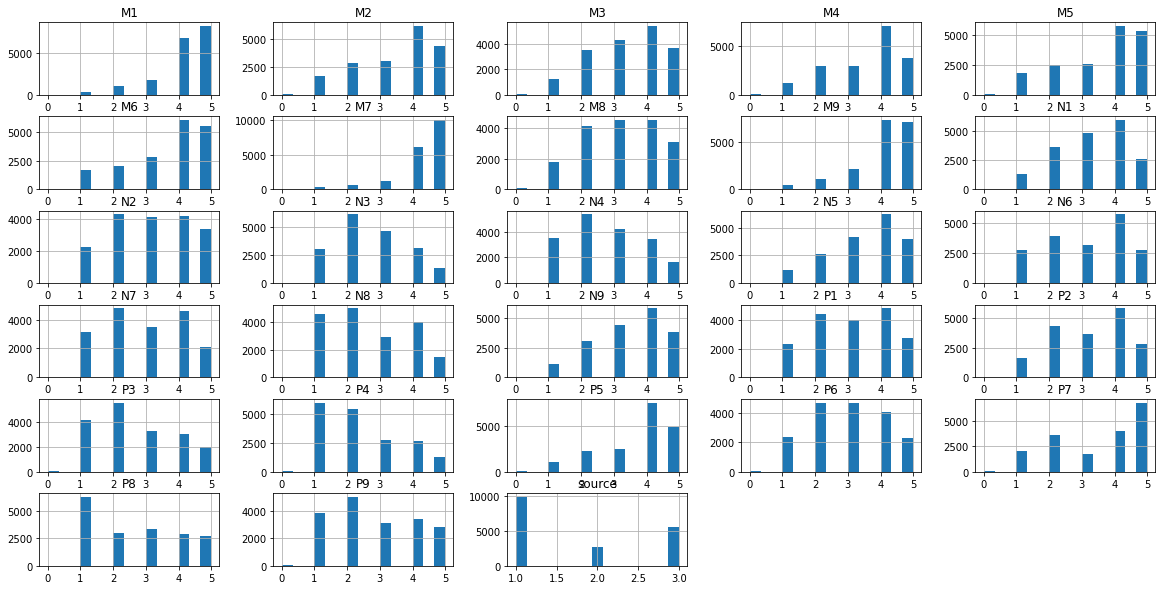

In [ ]:
df2.hist(bins = 15,figsize = (20, 10))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce324ec940>,
      dtype=object)

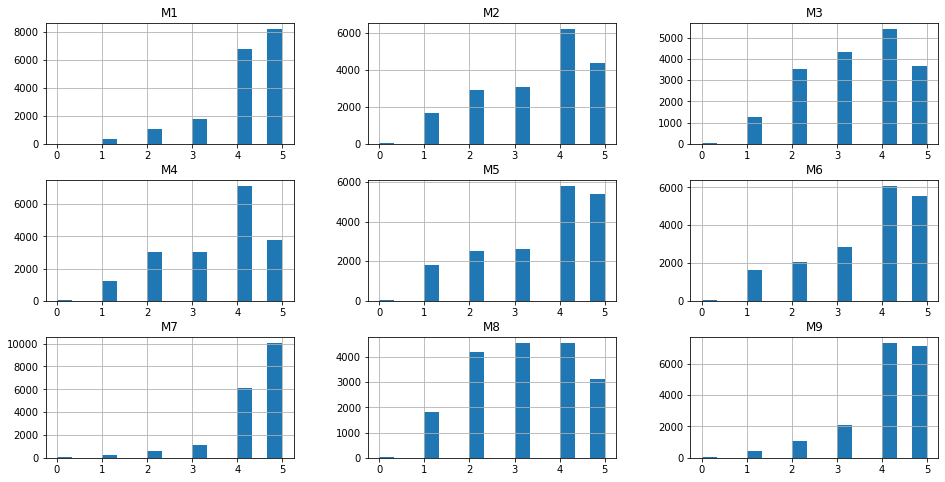

In [ ]:
df2.hist(column=['M1','M2','M3','M4','M5','M6','M7','M8','M9'], bins = 15,figsize = (16, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce30c29a30>,
      dtype=object)

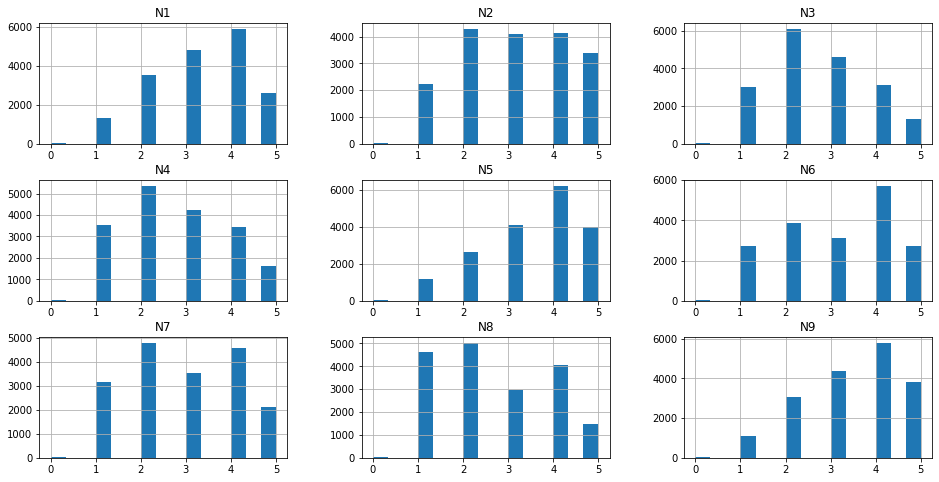

In [ ]:
df2.hist(column=['N1','N2','N3','N4','N5','N6','N7','N8','N9'], bins = 15,figsize = (16, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce2f8e88b0>,
      dtype=object)

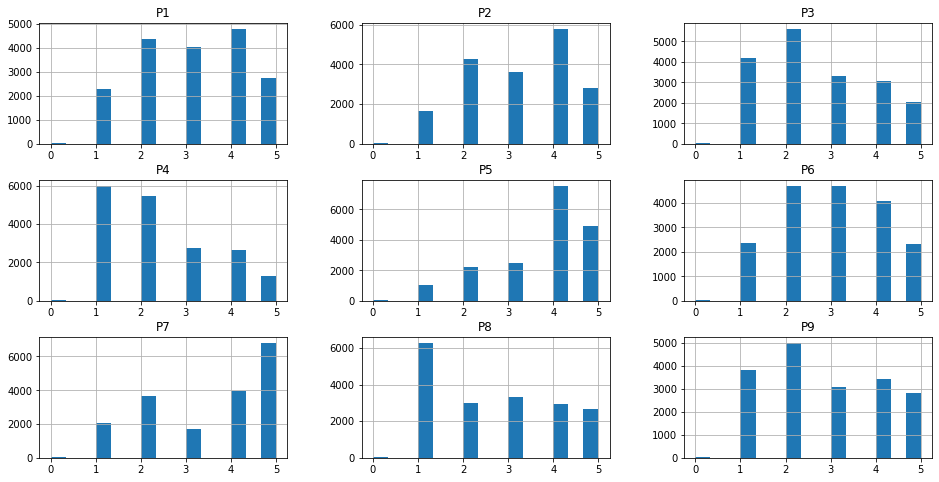

In [ ]:
df2.hist(column=['P1','P2','P3','P4','P5','P6','P7','P8','P9'],bins = 15,figsize = (16, 8))

<ipython-input-214-e10dd3356ce4>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_value=df2.mean()


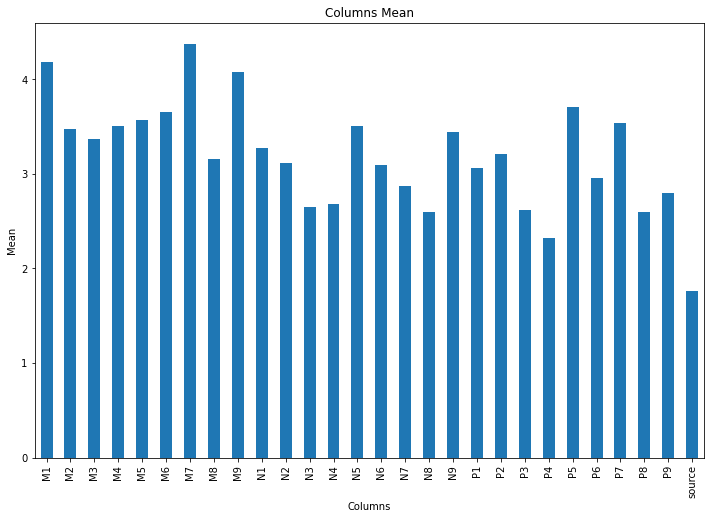

In [ ]:
mean_value=df2.mean()
plt.figure(figsize=(12,8))
mean_value.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Mean')
plt.title('Columns Mean')
plt.show()

In [ ]:
df2.isnull().sum()

M1         0
M2         0
M3         0
M4         0
M5         0
M6         0
M7         0
M8         0
M9         0
N1         0
N2         0
N3         0
N4         0
N5         0
N6         0
N7         0
N8         0
N9         0
P1         0
P2         0
P3         0
P4         0
P5         0
P6         0
P7         0
P8         0
P9         0
country    2
source     0
dtype: int64

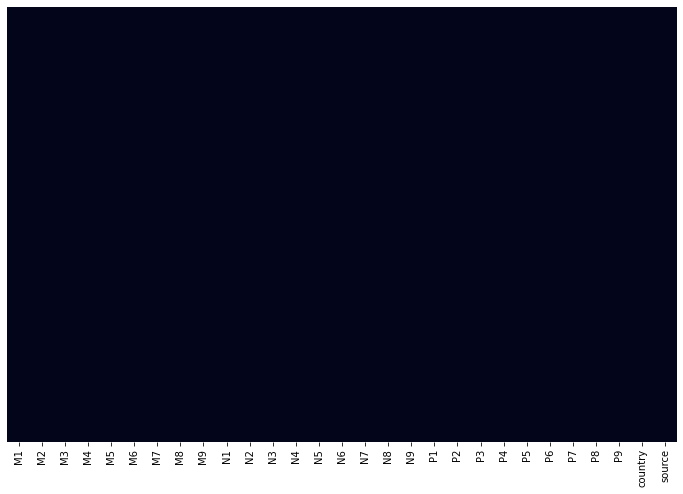

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.isnull(), yticklabels=False,cbar=False)

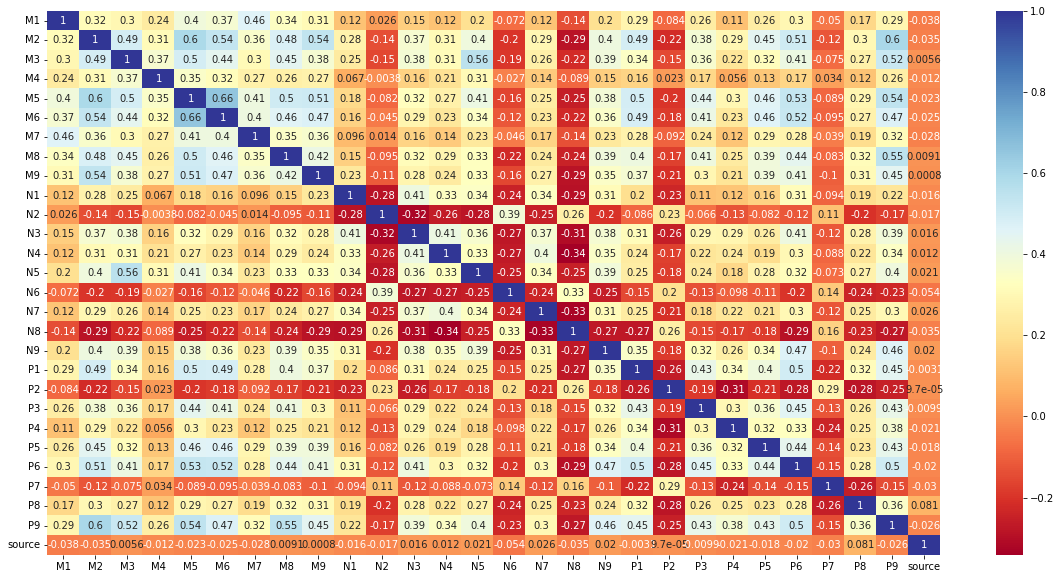

In [ ]:
corr = df2.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='RdYlBu')
plt.show()

**2. Data Preprocessing**


In [ ]:
df.drop(columns=['country','source'],inplace=True)
df.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,N9,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,4,4,4,4,4,4,4,3,4,2,...,4,3,4,3,2,4,4,4,4,4
1,2,1,5,2,2,1,2,2,3,1,...,2,1,1,1,5,4,1,5,3,2
2,3,3,3,5,1,1,5,5,3,2,...,5,3,5,3,1,3,1,2,3,1
3,5,5,4,5,5,5,5,5,5,5,...,5,5,1,5,2,5,5,5,1,5
4,4,4,2,5,5,5,4,1,4,3,...,5,4,5,3,1,4,3,5,4,1


In [ ]:
df.shape

(18192, 27)

In [ ]:
df['Class Labels'] = " "
df.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P1,P2,P3,P4,P5,P6,P7,P8,P9,Class Labels
0,4,4,4,4,4,4,4,3,4,2,...,3,4,3,2,4,4,4,4,4,
1,2,1,5,2,2,1,2,2,3,1,...,1,1,1,5,4,1,5,3,2,
2,3,3,3,5,1,1,5,5,3,2,...,3,5,3,1,3,1,2,3,1,
3,5,5,4,5,5,5,5,5,5,5,...,5,1,5,2,5,5,5,1,5,
4,4,4,2,5,5,5,4,1,4,3,...,4,5,3,1,4,3,5,4,1,


In [ ]:
class_list=[]
for i in range(df.shape[0]):
  m_mean=df.iloc[i,0:9].mean()
  n_mean=df.iloc[i,9:18].mean()
  p_mean=df.iloc[i,18:27].mean()
  diff_m_mean=3.86-m_mean
  diff_n_mean=3.68-n_mean
  diff_p_mean=3.40-p_mean
  diff_list=[diff_m_mean,diff_n_mean,diff_p_mean]
  min_value=min(diff_list)
  if(min_value==diff_m_mean):
    class_list.append('Machiavellinism')
  elif(min_value==diff_n_mean):
    class_list.append('Narcissism')
  else:
    class_list.append('Psychopathy')

In [ ]:
df["Class Labels"]=class_list
df.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P1,P2,P3,P4,P5,P6,P7,P8,P9,Class Labels
0,4,4,4,4,4,4,4,3,4,2,...,3,4,3,2,4,4,4,4,4,Psychopathy
1,2,1,5,2,2,1,2,2,3,1,...,1,1,1,5,4,1,5,3,2,Narcissism
2,3,3,3,5,1,1,5,5,3,2,...,3,5,3,1,3,1,2,3,1,Machiavellinism
3,5,5,4,5,5,5,5,5,5,5,...,5,1,5,2,5,5,5,1,5,Machiavellinism
4,4,4,2,5,5,5,4,1,4,3,...,4,5,3,1,4,3,5,4,1,Psychopathy


In [ ]:
df["Class Labels"].replace('Machiavellinism',0,inplace=True)
df["Class Labels"].replace('Narcissism',1,inplace=True)
df["Class Labels"].replace('Psychopathy',2,inplace=True)
df.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P1,P2,P3,P4,P5,P6,P7,P8,P9,Class Labels
0,4,4,4,4,4,4,4,3,4,2,...,3,4,3,2,4,4,4,4,4,2
1,2,1,5,2,2,1,2,2,3,1,...,1,1,1,5,4,1,5,3,2,1
2,3,3,3,5,1,1,5,5,3,2,...,3,5,3,1,3,1,2,3,1,0
3,5,5,4,5,5,5,5,5,5,5,...,5,1,5,2,5,5,5,1,5,0
4,4,4,2,5,5,5,4,1,4,3,...,4,5,3,1,4,3,5,4,1,2


In [ ]:
X=df.drop(columns=['Class Labels'])

In [ ]:
y=df['Class Labels']

**3.Different Machine Learning Models**

In [ ]:
from sklearn.model_selection import train_test_split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=51)

**3(a) Logistic Regression Baseline Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)

In [ ]:
lr.fit(X_train_lr, y_train_lr)
y_pred_lr=lr.predict(X_test_lr)

In [ ]:
accuracy_lr=accuracy_score(y_pred_lr, y_test_lr)
print("The Accuracy of LR Baseline Model:",accuracy_lr)

The Accuracy of LR Baseline Model: 1.0


**3(a) Logistic Regression from scratch**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax

class LR_Scratch:
    def fit(self, X, Y):
        self.W = gradient_descent(X, Y)

    def predict(self, X):
        Z = np.dot(X, self.W)
        A = softmax(Z, axis=1)
        # A = _softmax(Z)
        return A,np.argmax(A, axis=1)

def gradient(X, Y, W):

    Z = np.dot(X, W)
    A = softmax(Z, axis=1)
    # A = _softmax(Z)
    gd = np.dot(X.T, (A - Y))
    return gd

def gradient_descent(X, Y, max_iter=1000, lr=0.1):

    onehot_encoder = OneHotEncoder(sparse=False)
    Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1,1))
    W = np.zeros((X.shape[1], Y_onehot.shape[1]))
    # W = np.zeros((X.shape[1], Y.shape[0]))
    step = 0
    while step < max_iter:
        step += 1
        W -= lr * gradient(X, Y_onehot, W)
    return W

def find_accuracy(y_pred,y_actual):
  cnt=0
  for i in range(len(y_pred)):
      if y_pred[i]==y_actual[i]:
        cnt+=1;
  return cnt/len(y_pred)

# def _softmax(x):
#   return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

X_train_sc=X_train_lr.to_numpy()
y_train_sc=y_train_lr.to_numpy()
X_test_sc=X_test_lr.to_numpy()
y_test_sc=y_test_lr.to_numpy()


model = LR_Scratch()

model.fit(X_train_sc, y_train_sc)
y_pred_proba,y_pred_sc=model.predict(X_test_sc)
accuracy_sc=find_accuracy(y_test_sc,y_pred_sc)
print("The Accuracy of LR Scratch Model:","{:.2f}".format(accuracy_sc))
print(y_pred_proba)

The Accuracy of LR Scratch Model: 0.92
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


**3(c) Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
clf = SVC(C=0.1,kernel='linear',probability=True)
clf.fit(X_train_lr, y_train_lr)

SVC(C=0.1, kernel='linear', probability=True)

In [ ]:
y_pred_svm = clf.predict(X_test_lr)
accuracy_svm=clf.score(X_test_lr,y_test_lr)
print("The Accuracy of SVM Model:",accuracy_score(y_pred_svm, y_test_lr))

The Accuracy of SVM Model: 1.0


**4. Performance Evaluation**

Logistic Regression Baseline

[[2206    0    0]
 [   0  599    0]
 [   0    0  834]]


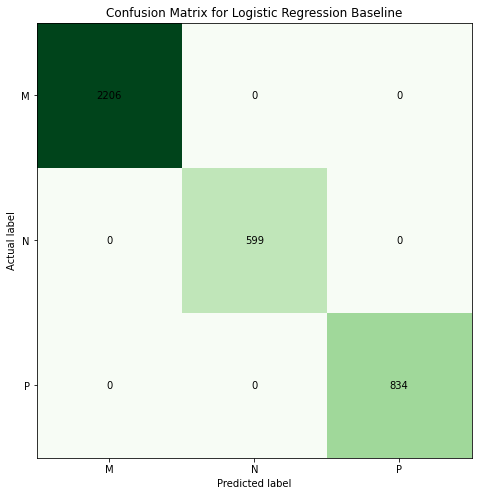

Accuracy: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2206
           1       1.00      1.00      1.00       599
           2       1.00      1.00      1.00       834

    accuracy                           1.00      3639
   macro avg       1.00      1.00      1.00      3639
weighted avg       1.00      1.00      1.00      3639



In [ ]:
print("Logistic Regression Baseline\n")

#create the confusion matrix
cm_lr = confusion_matrix(y_pred_lr, y_test_lr)


#plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(cm_lr, cmap=plt.cm.Greens)

print(cm_lr)
#add labels to the plot
class_names = ['M', 'N', 'P']
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
for i in range(cm_lr.shape[0]):#i=0
    for j in range(cm_lr.shape[1]):
        ax.text(x=j, y=i, s=cm_lr[i, j], va='center', ha='center')

plt.title('Confusion Matrix for Logistic Regression Baseline')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()
print("Accuracy:",accuracy_lr)
#print("\nConfusion matrix:\n", confusion_matrix(y_test_lr, y_pred_lr))
print("\nClassification report:\n", classification_report(y_test_lr, y_pred_lr))

SVM Performance



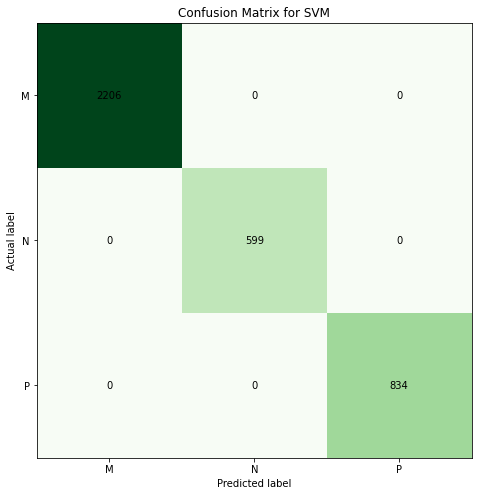

Accuracy:1.00

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2206
           1       1.00      1.00      1.00       599
           2       1.00      1.00      1.00       834

    accuracy                           1.00      3639
   macro avg       1.00      1.00      1.00      3639
weighted avg       1.00      1.00      1.00      3639



In [ ]:
print("SVM Performance\n")
cm_svm = confusion_matrix(y_pred_svm, y_test_lr)

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(cm_svm, cmap=plt.cm.Greens)

# Add labels to the plot
class_names = ['M', 'N', 'P']
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

# Loop over data dimensions and create text annotations.
for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        ax.text(x=j, y=i, s=cm_svm[i, j], va='center', ha='center')

plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()
print("Accuracy:{:.2f}".format(accuracy_svm))
#print("\nConfusion matrix:\n", confusion_matrix(y_test_lr, y_pred_svm))
print("\nClassification report:\n", classification_report(y_test_lr, y_pred_svm))

LR Scratch Performance

[[1950    7    3]
 [  51  552    1]
 [ 205   40  830]]


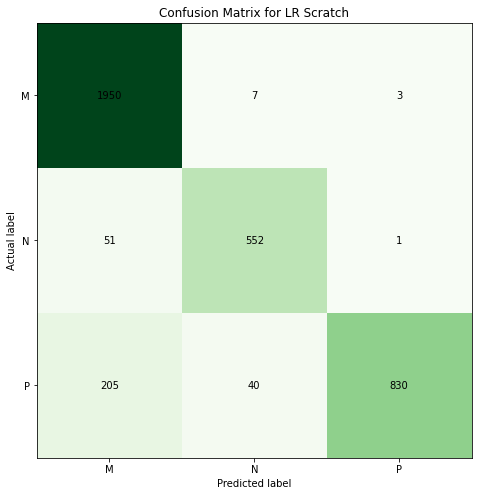

Accuracy:0.92

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.94      2206
           1       0.91      0.92      0.92       599
           2       0.77      1.00      0.87       834

    accuracy                           0.92      3639
   macro avg       0.89      0.93      0.91      3639
weighted avg       0.93      0.92      0.92      3639



In [ ]:
print("LR Scratch Performance\n")
cm_sc = confusion_matrix(y_pred_sc, y_test_lr)

#plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(cm_sc, cmap=plt.cm.Greens)

print(cm_sc)
#Add labels to the plot
class_names = ['M', 'N', 'P']
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

for i in range(cm_sc.shape[0]):
    for j in range(cm_sc.shape[1]):
        ax.text(x=j, y=i, s=cm_sc[i, j], va='center', ha='center')

plt.title('Confusion Matrix for LR Scratch')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()
print("Accuracy:{:.2f}".format(accuracy_sc))
#print("\nConfusion matrix:\n", confusion_matrix(y_test_lr, y_pred_svm))
print("\nClassification report:\n", classification_report(y_test_sc, y_pred_sc))

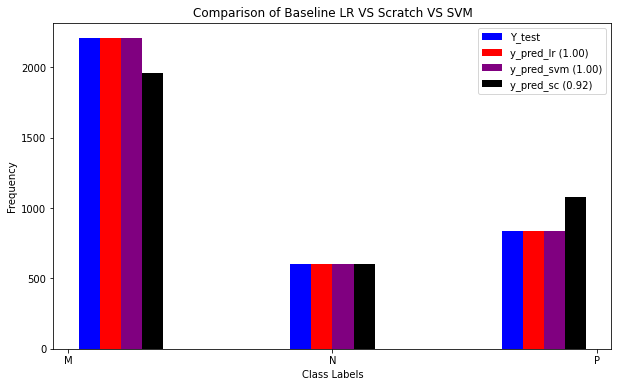

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(
    [y_test_lr, y_pred_lr, y_pred_svm,y_pred_sc], 
    label=['Y_test', f'y_pred_lr ({"{:.2f}".format(accuracy_lr)})', f'y_pred_svm ({"{:.2f}".format(accuracy_svm)})', f'y_pred_sc ({"{:.2f}".format(accuracy_sc)})'], 
    bins=5, 
    color=['blue', 'red', 'purple','black'],
    alpha=1, 
    histtype='bar')

class_names = ['M', 'N', 'P']
ax.set_xticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)

plt.title('Comparison of Baseline LR VS Scratch VS SVM')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.legend()

plt.show()

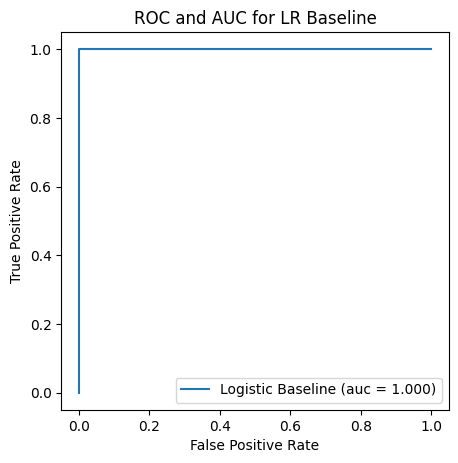

In [ ]:
pred_prob = lr.predict_proba(X_test_lr)

fpr, tpr, threshold = roc_curve(y_test_lr, pred_prob[:,1], pos_label=1)


auc_lr = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='Logistic Baseline (auc = %0.3f)' % auc_lr)
plt.title('ROC and AUC for LR Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

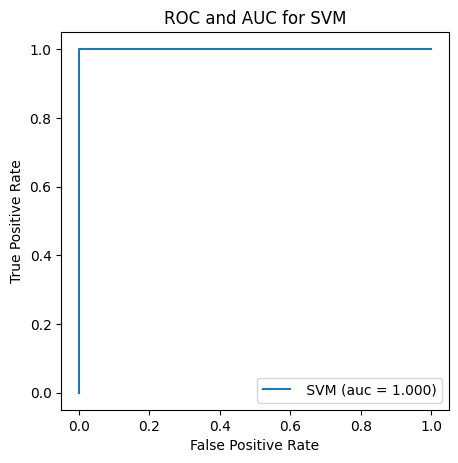

In [ ]:
pred_prob = clf.predict_proba(X_test_lr)

fpr, tpr, threshold = roc_curve(y_test_lr, pred_prob[:,1], pos_label=1)


auc_lr = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label=' SVM (auc = %0.3f)' % auc_lr)
plt.title('ROC and AUC for SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

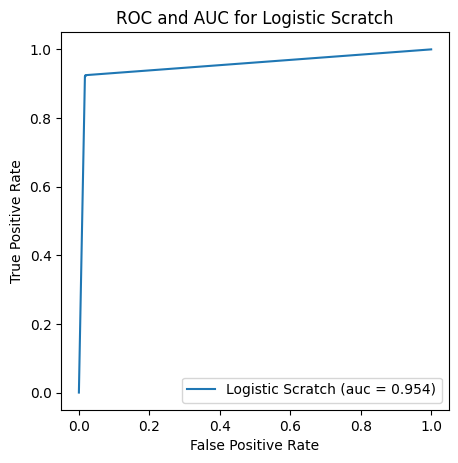

In [ ]:
fpr, tpr, threshold = roc_curve(y_test_lr, y_pred_proba[:,1], pos_label=1)

auc_lr = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='Logistic Scratch (auc = %0.3f)' % auc_lr)

plt.title('ROC and AUC for Logistic Scratch')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()